<H1>ALERT CLASSIFICATION (FAKE OR REAL)</H1>

In [98]:
import pandas as pd
import numpy as np




<H3>LOADING DATA </H3>

In [99]:
text=pd.read_csv("data_new.csv")
text

,id,text,label,lat,lon,source
0,19,alert Tsunami by Breaking: IrCOIS,relevant,22.00,88.37,facebook
1,47,Clear sunny day in alert Chennai,irrelevant,13.08,80.27,twitter
2,58,warning coconut water by Enjoying sea,irrelevant,15.29,73.94,twitter
3,53,Residents safe evacuated to update shelters,relevant,19.81,85.84,facebook
4,26,danger Harbor closed due breaking to cyclone d...,relevant,19.97,85.82,facebook
...,...,...,...,...,...,...
995,36,Flood announced warning,relevant,22.00,88.37,citizen
996,48,Warning disaster safe from office,relevant,21.38,87.53,citizen
997,17,warning Beacm party vibes!!,irrelevant,15.29,73.94,twitter
998,24,alert Huge mides damaging walls,relevant,9.93,76.25,twitter


In [100]:
text.dtypes

id          int64
text       object
label      object
lat       float64
lon       float64
source     object
dtype: object

In [101]:
text.size

6000

In [104]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1000 non-null   int64  
 1   text    1000 non-null   object 
 2   label   1000 non-null   object 
 3   lat     1000 non-null   float64
 4   lon     1000 non-null   float64
 5   source  1000 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 47.0+ KB


In [102]:
text.shape

(1000, 6)

In [105]:
text.isnull().sum()

id        0
text      0
label     0
lat       0
lon       0
source    0
dtype: int64

In [106]:
text.describe()

,id,lat,lon
count,1000.000000,1000.000000,1000.000000
mean,30.601000,17.292670,82.334650
std,18.307839,4.724979,5.440706
min,1.000000,8.480000,70.370000
25%,12.000000,13.080000,76.950000
50%,32.000000,19.810000,84.790000
75%,48.000000,21.380000,87.000000
max,60.000000,22.570000,88.370000


<H2>TEXT PREPROCESSING</H2>

In [107]:
text["text"]=text["text"].str.lower()
text


,id,text,label,lat,lon,source
0,19,alert tsunami by breaking: ircois,relevant,22.00,88.37,facebook
1,47,clear sunny day in alert chennai,irrelevant,13.08,80.27,twitter
2,58,warning coconut water by enjoying sea,irrelevant,15.29,73.94,twitter
3,53,residents safe evacuated to update shelters,relevant,19.81,85.84,facebook
4,26,danger harbor closed due breaking to cyclone d...,relevant,19.97,85.82,facebook
...,...,...,...,...,...,...
995,36,flood announced warning,relevant,22.00,88.37,citizen
996,48,warning disaster safe from office,relevant,21.38,87.53,citizen
997,17,warning beacm party vibes!!,irrelevant,15.29,73.94,twitter
998,24,alert huge mides damaging walls,relevant,9.93,76.25,twitter


In [108]:
text["target"] = text["label"].apply(lambda x: 1 if x in ["relevant", "panic"] else 0)
print(text[["label", "target"]].head())


        label  target
0    relevant       1
1  irrelevant       0
2  irrelevant       0
3    relevant       1
4    relevant       1


In [109]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
text["no_stopwords"] = text["text"].astype(str).apply(
    lambda x: " ".join([word for word in x.split() if word.lower() not in stop_words])
)

text[["text", "no_stopwords"]].head
text.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,text,label,lat,lon,source,target,no_stopwords
0,19,alert tsunami by breaking: ircois,relevant,22.00,88.37,facebook,1,alert tsunami breaking: ircois
1,47,clear sunny day in alert chennai,irrelevant,13.08,80.27,twitter,0,clear sunny day alert chennai
2,58,warning coconut water by enjoying sea,irrelevant,15.29,73.94,twitter,0,warning coconut water enjoying sea
3,53,residents safe evacuated to update shelters,relevant,19.81,85.84,facebook,1,residents safe evacuated update shelters
4,26,danger harbor closed due breaking to cyclone d...,relevant,19.97,85.82,facebook,1,danger harbor closed due breaking cyclone danger


In [110]:
import re
text["text"] = text["text"].str.replace(r"[!?:,]", "", regex=True)
text


,id,text,label,lat,lon,source,target,no_stopwords
0,19,alert tsunami by breaking ircois,relevant,22.00,88.37,facebook,1,alert tsunami breaking: ircois
1,47,clear sunny day in alert chennai,irrelevant,13.08,80.27,twitter,0,clear sunny day alert chennai
2,58,warning coconut water by enjoying sea,irrelevant,15.29,73.94,twitter,0,warning coconut water enjoying sea
3,53,residents safe evacuated to update shelters,relevant,19.81,85.84,facebook,1,residents safe evacuated update shelters
4,26,danger harbor closed due breaking to cyclone d...,relevant,19.97,85.82,facebook,1,danger harbor closed due breaking cyclone danger
...,...,...,...,...,...,...,...,...
995,36,flood announced warning,relevant,22.00,88.37,citizen,1,flood announced warning
996,48,warning disaster safe from office,relevant,21.38,87.53,citizen,1,warning disaster safe office
997,17,warning beacm party vibes,irrelevant,15.29,73.94,twitter,0,warning beacm party vibes!!
998,24,alert huge mides damaging walls,relevant,9.93,76.25,twitter,1,alert huge mides damaging walls


In [111]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
text["text"] = text["text"].astype(str).apply(
    lambda x: " ".join([word for word in x.split() if word.lower() not in stop_words])
)
print(text[["text"]])


                                                 text
0                       alert tsunami breaking ircois
1                       clear sunny day alert chennai
2                  warning coconut water enjoying sea
3            residents safe evacuated update shelters
4    danger harbor closed due breaking cyclone danger
..                                                ...
995                           flood announced warning
996                      warning disaster safe office
997                         warning beacm party vibes
998                   alert huge mides damaging walls
999             cyclone warning coast odxsha breaking

[1000 rows x 1 columns]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
print(text['label'].value_counts())

label
relevant      700
irrelevant    200
panic         100
Name: count, dtype: int64


In [116]:
print(text[['text','label']].to_string(index=False))
text.head(5)


                                                  text      label
                         alert tsunami breaking ircois   relevant
                         clear sunny day alert chennai irrelevant
                    warning coconut water enjoying sea irrelevant
              residents safe evacuated update shelters   relevant
      danger harbor closed due breaking cyclone danger   relevant
                             boats damaged surge storm   relevant
                               stbmerged roads coastal   relevant
                          coast cyclone odisha warning   relevant
                      alert kids castles sand building irrelevant
                      coastal breaking roadv submerged   relevant
                           beautiful sunny beach today irrelevant
                  warning fiahermen say sea rough safe   relevant
                     flooded streetu high warning tjde   relevant
                                     run alert tsunami      panic
          

,id,text,label,lat,lon,source,target,no_stopwords
0,19,alert tsunami breaking ircois,relevant,22.00,88.37,facebook,1,alert tsunami breaking: ircois
1,47,clear sunny day alert chennai,irrelevant,13.08,80.27,twitter,0,clear sunny day alert chennai
2,58,warning coconut water enjoying sea,irrelevant,15.29,73.94,twitter,0,warning coconut water enjoying sea
3,53,residents safe evacuated update shelters,relevant,19.81,85.84,facebook,1,residents safe evacuated update shelters
4,26,danger harbor closed due breaking cyclone danger,relevant,19.97,85.82,facebook,1,danger harbor closed due breaking cyclone danger


In [117]:
label_map = {
'relevant': 'real',
'irrelevant': 'fake',
'panic': 'real'
}
if text['label'].isnull().any():
   print('\nWarning: some labels were not in label_map. Unique labels found: ', text['label'].unique())
   text['label'] = text['label'].fillna('fake')


print("classification:")
print(text['label'].value_counts())

classification:
label
relevant      700
irrelevant    200
panic         100
Name: count, dtype: int64


In [118]:
import re
text["text"] = text["text"].str.replace(r"[!?:,]", "", regex=True)
text.head()


,id,text,label,lat,lon,source,target,no_stopwords
0,19,alert tsunami breaking ircois,relevant,22.00,88.37,facebook,1,alert tsunami breaking: ircois
1,47,clear sunny day alert chennai,irrelevant,13.08,80.27,twitter,0,clear sunny day alert chennai
2,58,warning coconut water enjoying sea,irrelevant,15.29,73.94,twitter,0,warning coconut water enjoying sea
3,53,residents safe evacuated update shelters,relevant,19.81,85.84,facebook,1,residents safe evacuated update shelters
4,26,danger harbor closed due breaking cyclone danger,relevant,19.97,85.82,facebook,1,danger harbor closed due breaking cyclone danger


<h2> DATA VISUALIZATION</h2>

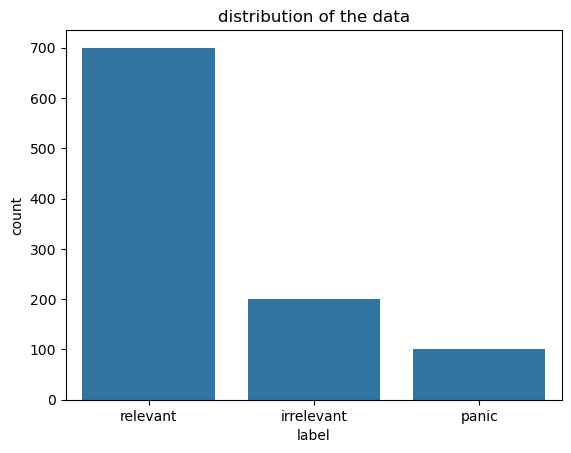

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="label", data=text)
plt.title("distribution of the data")
plt.show()


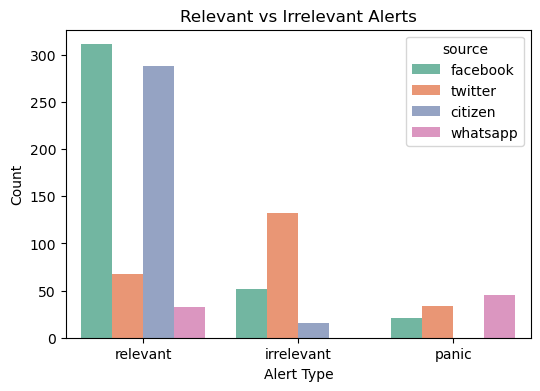

In [120]:

plt.figure(figsize=(6,4))
sns.countplot(x="label",hue="source" ,data=text, palette="Set2")
plt.title("Relevant vs Irrelevant Alerts")
plt.xlabel("Alert Type")
plt.ylabel("Count")
plt.show()


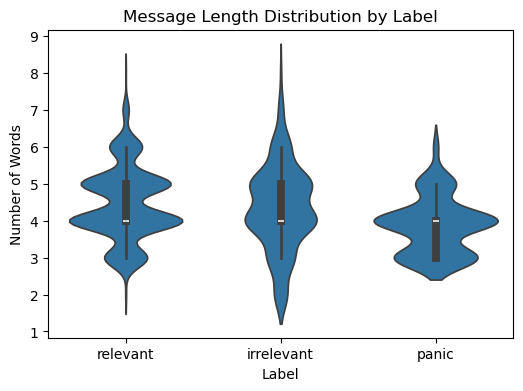

In [121]:

text["text_len"] = text["text"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(6,4))
sns.violinplot(x="label", y="text_len", data=text)
plt.title("Message Length Distribution by Label")
plt.xlabel("Label")
plt.ylabel("Number of Words")
plt.show()


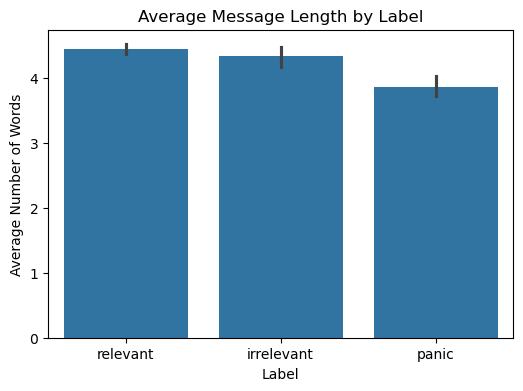

In [122]:
text["text_len"] = text["text"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(6,4))
sns.barplot(x="label", y="text_len", data=text)
plt.title("Average Message Length by Label")
plt.xlabel("Label")
plt.ylabel("Average Number of Words")
plt.show()


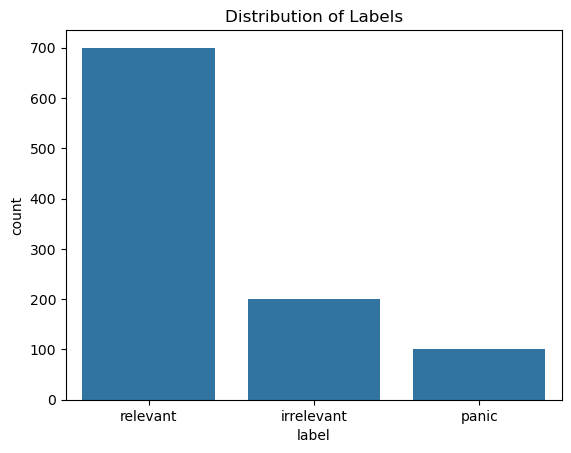

In [123]:
sns.countplot(x="label", data=text)
plt.title("Distribution of Labels")
plt.show()


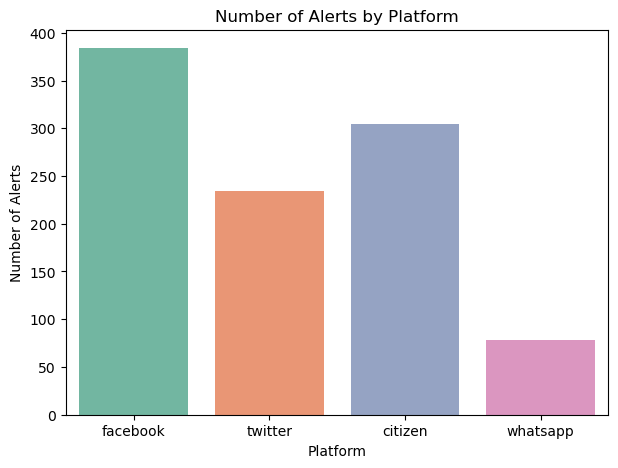

In [124]:

plt.figure(figsize=(7,5))
sns.countplot(x="source", hue="source",data=text, palette="Set2")
plt.title("Number of Alerts by Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Alerts")
plt.show()


In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 

<H2>TRAINING TESTING AND SPLITING DATA</H2>

In [126]:
X = text["text"]
y = text["label"]  
print(X.head())
print(y.head())


0                       alert tsunami breaking ircois
1                       clear sunny day alert chennai
2                  warning coconut water enjoying sea
3            residents safe evacuated update shelters
4    danger harbor closed due breaking cyclone danger
Name: text, dtype: object
0      relevant
1    irrelevant
2    irrelevant
3      relevant
4      relevant
Name: label, dtype: object


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test.head()



(29               scared everyonedis leaving beach
 535                    high alert dtclared kerala
 695                   update twde strong suddenly
 557                       warning disaster officf
 836                       warning disaster offico
                           ...                    
 106            tide streetszbreaking high flooded
 270    fishermen danger say sea danger rough safe
 860                  breaking fishermen warned go
 435                      thegtide strong suddenly
 102                             run tsunami alert
 Name: text, Length: 800, dtype: object,
 521                    huge twell waves approaxhing
 737                       flooded streets high tide
 740               enjoying coconut water dangir sea
 660                sea warning croxs entering water
 411                             waves panic massive
                            ...                     
 408               tide strong update alert suddenly
 332             beautiful 

<H1>TERM FREQUENCY(FEATURE EXTRACTION)</H1>

In [128]:
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train) 
X_test_vect = vectorizer.transform(X_test) 

In [129]:

model = LogisticRegression(max_iter=500)
model.fit(X_train_vect, y_train)
model




LogisticRegression(max_iter=500)

In [130]:
y_pred = model.predict(X_test_vect)
y_pred

array(['relevant', 'relevant', 'irrelevant', 'relevant', 'relevant',
       'panic', 'relevant', 'relevant', 'irrelevant', 'relevant',
       'relevant', 'relevant', 'relevant', 'irrelevant', 'relevant',
       'panic', 'relevant', 'relevant', 'relevant', 'relevant',
       'relevant', 'relevant', 'irrelevant', 'relevant', 'relevant',
       'relevant', 'relevant', 'relevant', 'relevant', 'irrelevant',
       'relevant', 'relevant', 'relevant', 'irrelevant', 'relevant',
       'relevant', 'relevant', 'irrelevant', 'relevant', 'irrelevant',
       'irrelevant', 'irrelevant', 'relevant', 'relevant', 'relevant',
       'relevant', 'relevant', 'relevant', 'relevant', 'panic',
       'relevant', 'relevant', 'relevant', 'relevant', 'relevant',
       'relevant', 'relevant', 'irrelevant', 'irrelevant', 'relevant',
       'panic', 'relevant', 'relevant', 'irrelevant', 'relevant',
       'relevant', 'panic', 'relevant', 'relevant', 'relevant', 'panic',
       'relevant', 'relevant', 'irrelevant

In [131]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

  irrelevant       1.00      0.98      0.99        44
       panic       1.00      0.94      0.97        17
    relevant       0.99      1.00      0.99       139

    accuracy                           0.99       200
   macro avg       1.00      0.97      0.98       200
weighted avg       0.99      0.99      0.99       200

Confusion Matrix:
 [[ 43   0   1]
 [  0  16   1]
 [  0   0 139]]


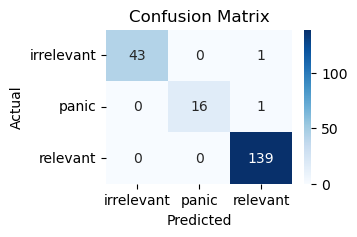

In [132]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [133]:
from sklearn.cluster import DBSCAN

coords =text[["lat", "lon"]].values
db = DBSCAN(eps=0.5, min_samples=2).fit(coords)
text["cluster"] = db.labels_
db

print(" Hotspots ")
print(text[["text", "lat", "lon", "cluster"]])

 Hotspots 
                                                 text    lat    lon  cluster
0                       alert tsunami breaking ircois  22.00  88.37        0
1                       clear sunny day alert chennai  13.08  80.27        1
2                  warning coconut water enjoying sea  15.29  73.94        2
3            residents safe evacuated update shelters  19.81  85.84        3
4    danger harbor closed due breaking cyclone danger  19.97  85.82        3
..                                                ...    ...    ...      ...
995                           flood announced warning  22.00  88.37        0
996                      warning disaster safe office  21.38  87.53       10
997                         warning beacm party vibes  15.29  73.94        2
998                   alert huge mides damaging walls   9.93  76.25        9
999             cyclone warning coast odxsha breaking  19.31  84.79        6

[1000 rows x 4 columns]


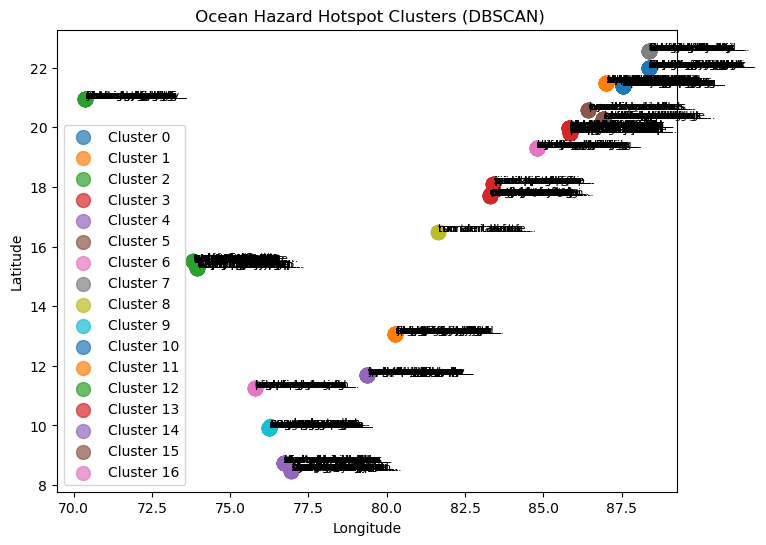

In [134]:
plt.figure(figsize=(8, 6))
clusters = text["cluster"].unique()
colors = plt.cm.tab10.colors  

for cluster_id in clusters:
    cluster_points = text[text["cluster"] == cluster_id]
    plt.scatter(
        cluster_points["lon"],
        cluster_points["lat"],
        label=f"Cluster {cluster_id}" if cluster_id != -1 else "Noise",
        s=100,
        alpha=0.7
    )
 
    for _, row in cluster_points.iterrows():
        plt.text(row["lon"]+0.02, row["lat"]+0.02, row["text"][:15]+"...", fontsize=8)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(" Ocean Hazard Hotspot Clusters (DBSCAN)")
plt.legend()
plt.show()

 Keywords
update: 162
breaking: 145
alert: 140
beach: 106
safe: 97
tide: 86
sea: 83
danger: 81
waves: 77
cyclone: 74
high: 68
suddenly: 68
disaster: 64
strong: 63


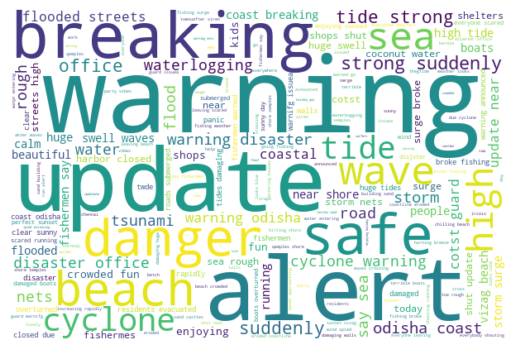

In [139]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join(text["text"])
word_freq = Counter(all_text.split()).most_common(15)

print(" Keywords")
for word, freq in word_freq:
    print(f"{word}: {freq}")
wc = WordCloud(width=600, height=400, background_color="white").generate(all_text)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

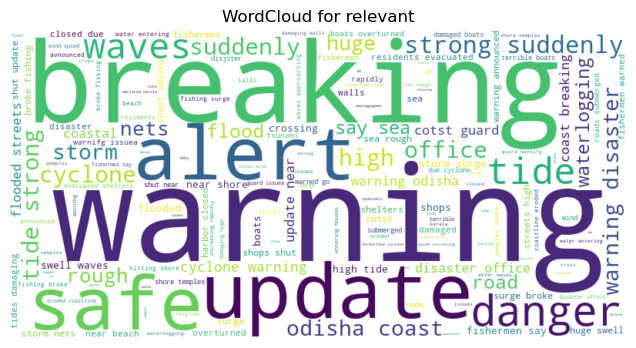

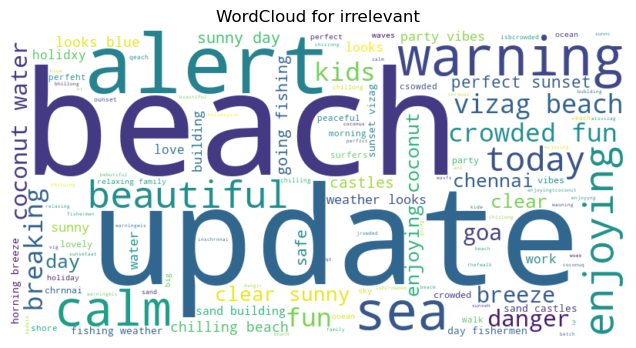

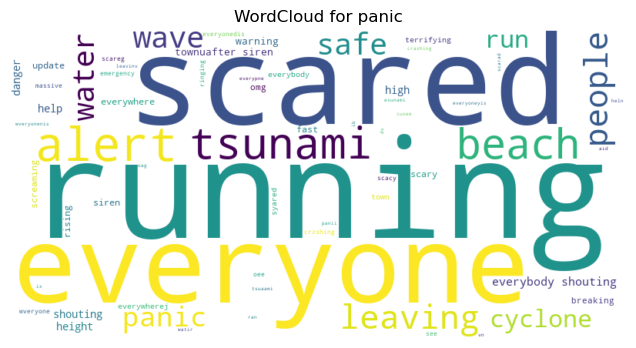

In [140]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


for label in text["label"].unique():
    text_data = " ".join(text[text["label"] == label]["text"])
    wc = WordCloud(width=800, height=400, background_color="white").generate(text_data)
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {label}")
    plt.show()


In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import joblib
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
joblib.dump(model, 'text_classifier_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:
import joblib
model = joblib.load('text_classifier_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')
def predict_user_input(text_input):
    text_tfidf = vectorizer.transform([text_input])
    pred_label = model.predict(text_tfidf)[0]
    pred_prob = model.predict_proba(text_tfidf)[0]
    confidence = max(pred_prob)
    return pred_label, confidence
while True:
    user_text = input("Enter text (or type 'exit' to quit): ")
    if user_text.lower() == 'exit':
        break
    label, conf = predict_user_input(user_text)
    print(f"Predicted Label: {label}, Confidence: {conf:.2f}")
